In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Processing 

In [4]:
data_of_car = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data_of_car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
data_of_car.shape

(4340, 8)

In [6]:
data_of_car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
print(data_of_car.fuel.value_counts())
print()

print(data_of_car.seller_type.value_counts())
print()

print(data_of_car.transmission.value_counts())
print()

print(data_of_car.owner.value_counts())
print()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

Manual       3892
Automatic     448
Name: transmission, dtype: int64

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64



The Categorical Data

In [8]:
data_of_car.replace({'fuel': {'Diesel':1, 'Petrol':2, 'CNG':3, 'LPG':4, 'Electric':5}}, inplace=True)
data_of_car.replace({'seller_type': {'Individual':1, 'Dealer':2, 'Trustmark Dealer':3}}, inplace=True)
data_of_car.replace({'transmission': {'Manual':1, 'Automatic':2}}, inplace=True)
data_of_car.replace({'owner': {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4, 'Test Drive Car':5}}, inplace=True)
data_of_car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,2,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,2,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,2,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1,1,1,2
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1,1,1,2
4337,Maruti 800 AC BSIII,2009,110000,83000,2,1,1,2
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1,1,1,1


That data split into target

In [9]:
X = data_of_car.drop(['name', 'selling_price'],axis=1)
Y = data_of_car['selling_price']

In [10]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     2            1             1      1
1     2007      50000     2            1             1      1
2     2012     100000     1            1             1      1
3     2017      46000     2            1             1      1
4     2014     141000     1            1             1      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            1             1      2
4336  2014      80000     1            1             1      2
4337  2009      83000     2            1             1      2
4338  2016      90000     1            1             1      1
4339  2016      40000     2            1             1      1

[4340 rows x 6 columns]


In [11]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Split into Training and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state=2)

Model of Training

a. Linear Regression 

In [14]:
lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model of Evaluation

In [16]:
training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
score_error = metrics.r2_score(Y_train, training_data_prediction)
print("R squad Error : ", score_error)

R squad Error :  0.4430787587921934


Show the actual prices and Predict prices

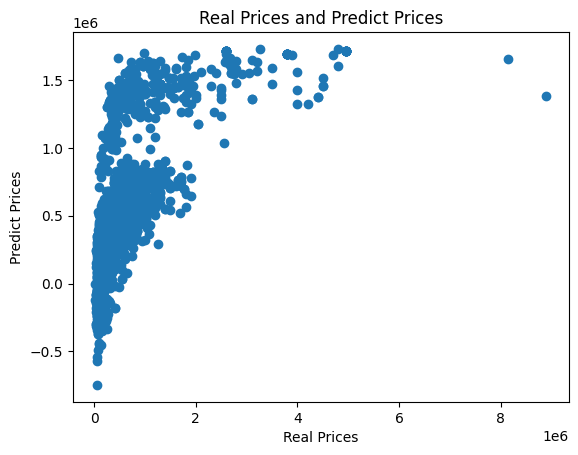

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Real Prices")
plt.ylabel("Predict Prices")
plt.title("Real Prices and Predict Prices")
plt.show()

In [36]:
results_df = pd.DataFrame({'Real Prices': Y_train, 'Predicted Prices': training_data_prediction})

c:\Users\62877\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

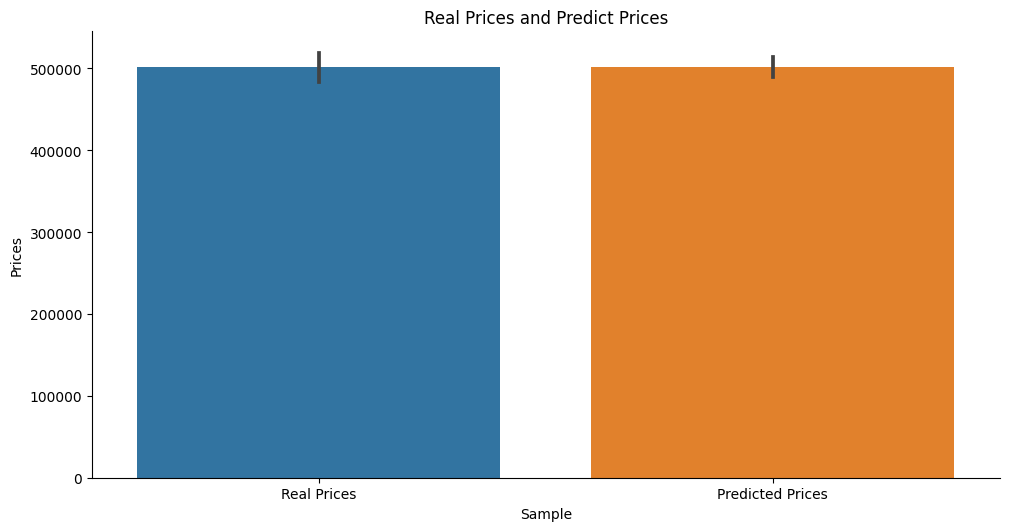

In [37]:
plt.figure(figsize=(12, 6))
sns.catplot(data=results_df, kind='bar', aspect=2)
plt.xlabel("Sample")
plt.ylabel("Prices")
plt.title("Real Prices and Predict Prices")
plt.show()

In [22]:
test_data_prediction = lin_reg_model.predict(X_test)

In [23]:
score_error = metrics.r2_score(Y_test, test_data_prediction)
print("R squad Error : ", score_error)

R squad Error :  0.5212912933220212


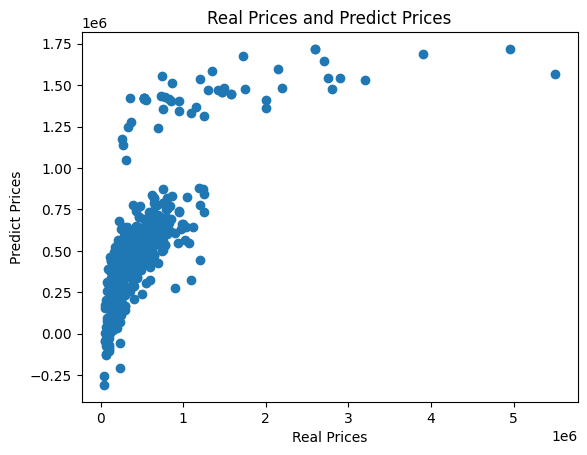

In [32]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Real Prices")
plt.ylabel("Predict Prices")
plt.title("Real Prices and Predict Prices")
plt.show()


In [33]:
results_df = pd.DataFrame({'Real Prices': Y_test, 'Predicted Prices': test_data_prediction})

c:\Users\62877\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

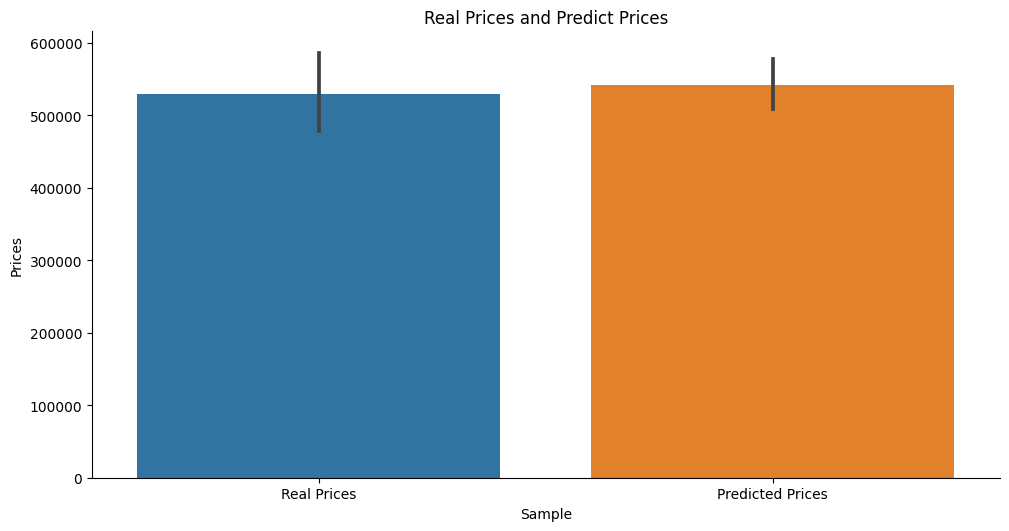

In [34]:
plt.figure(figsize=(12, 6))
sns.catplot(data=results_df, kind='bar', aspect=2)
plt.xlabel("Sample")
plt.ylabel("Prices")
plt.title("Real Prices and Predict Prices")
plt.show()

b. Lasso Regression

In [38]:
lass_reg_model = Lasso()

In [39]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model of Evaluation

In [40]:
training_data_prediction = lass_reg_model.predict(X_train)

In [41]:
score_error = metrics.r2_score(Y_train, training_data_prediction)
print("R squad Error : ", score_error)

R squad Error :  0.4430787587404139


Show the actual prices and Predict prices

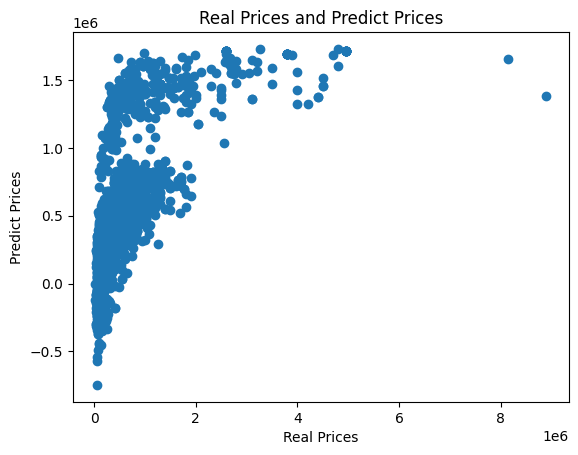

In [42]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Real Prices")
plt.ylabel("Predict Prices")
plt.title("Real Prices and Predict Prices")
plt.show()

In [43]:
results_df = pd.DataFrame({'Real Prices': Y_train, 'Predicted Prices': training_data_prediction})

c:\Users\62877\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

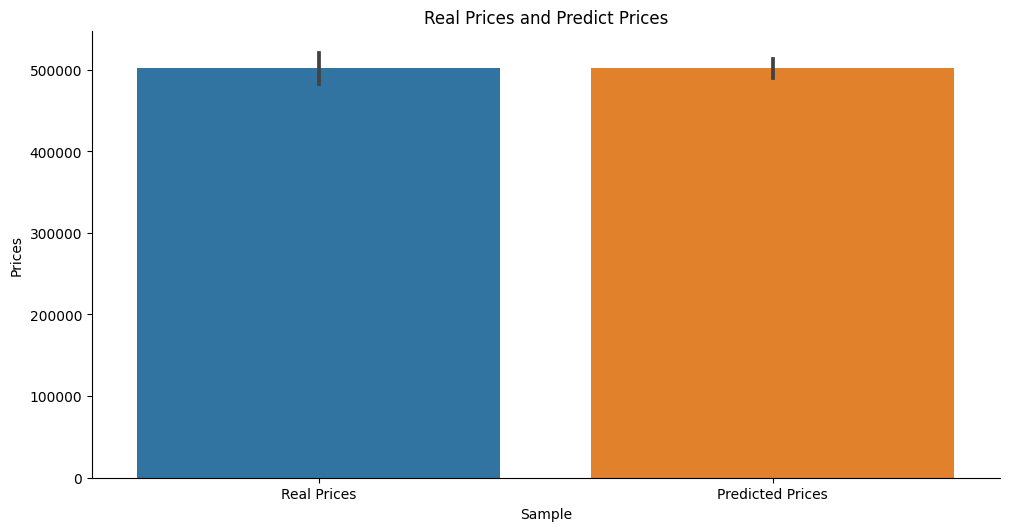

In [44]:
plt.figure(figsize=(12, 6))
sns.catplot(data=results_df, kind='bar', aspect=2)
plt.xlabel("Sample")
plt.ylabel("Prices")
plt.title("Real Prices and Predict Prices")
plt.show()

In [45]:
test_data_prediction = lass_reg_model.predict(X_test)

In [46]:
score_error = metrics.r2_score(Y_test, test_data_prediction)
print("R squad Error : ", score_error)

R squad Error :  0.5212906062492386


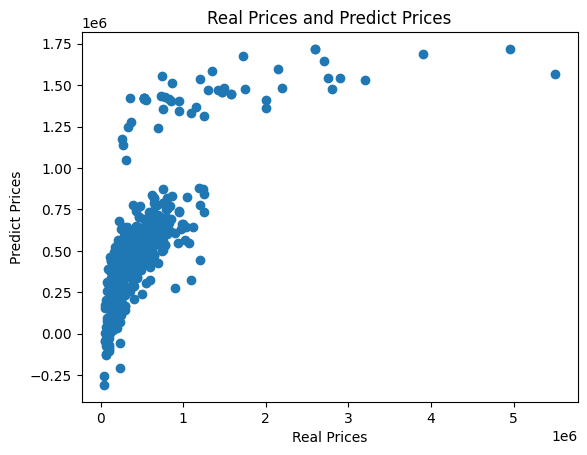

In [47]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Real Prices")
plt.ylabel("Predict Prices")
plt.title("Real Prices and Predict Prices")
plt.show()


In [48]:
results_df = pd.DataFrame({'Real Prices': Y_test, 'Predicted Prices': test_data_prediction})

c:\Users\62877\anaconda3\envs\myenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

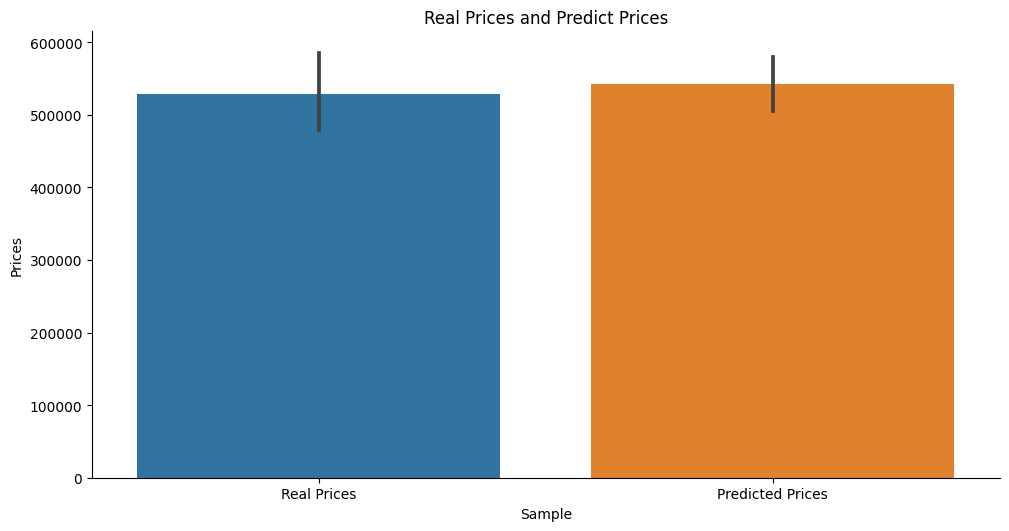

In [49]:
plt.figure(figsize=(12, 6))
sns.catplot(data=results_df, kind='bar', aspect=2)
plt.xlabel("Sample")
plt.ylabel("Prices")
plt.title("Real Prices and Predict Prices")
plt.show()